 # **Data Preprocessing**

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
df['species']=df['species'].str.replace('Iris-','')
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


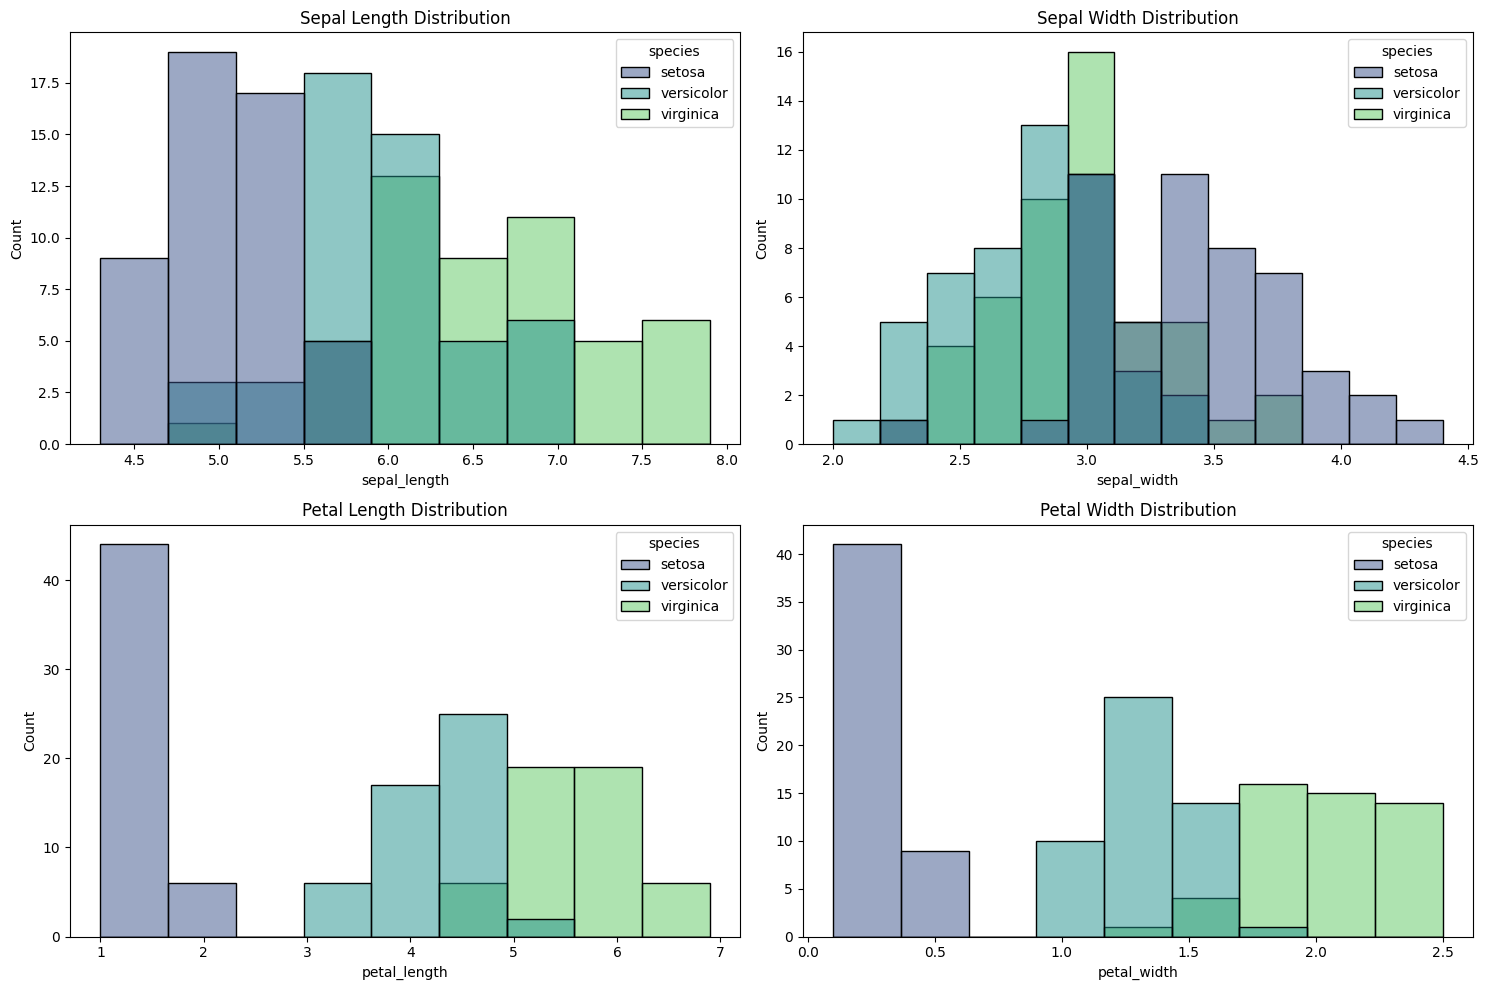

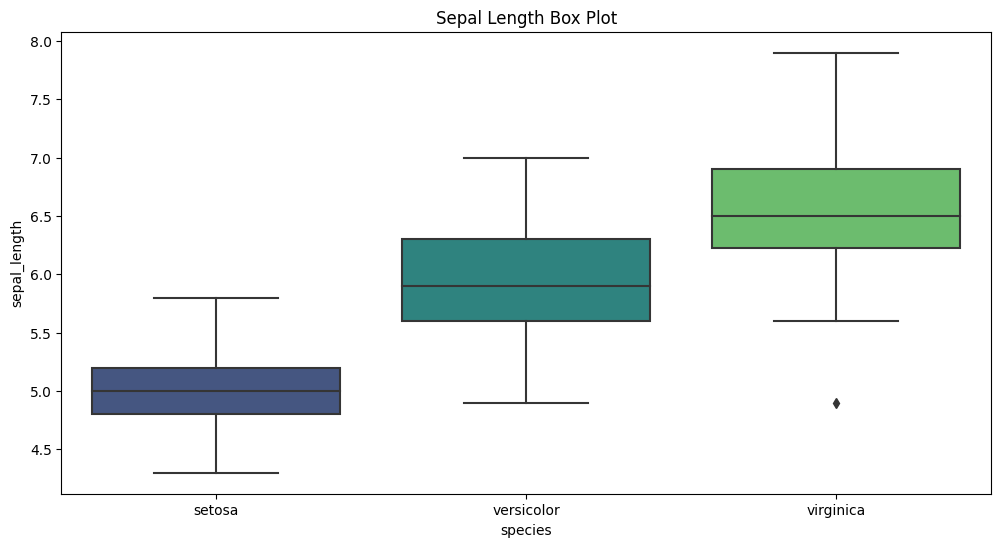

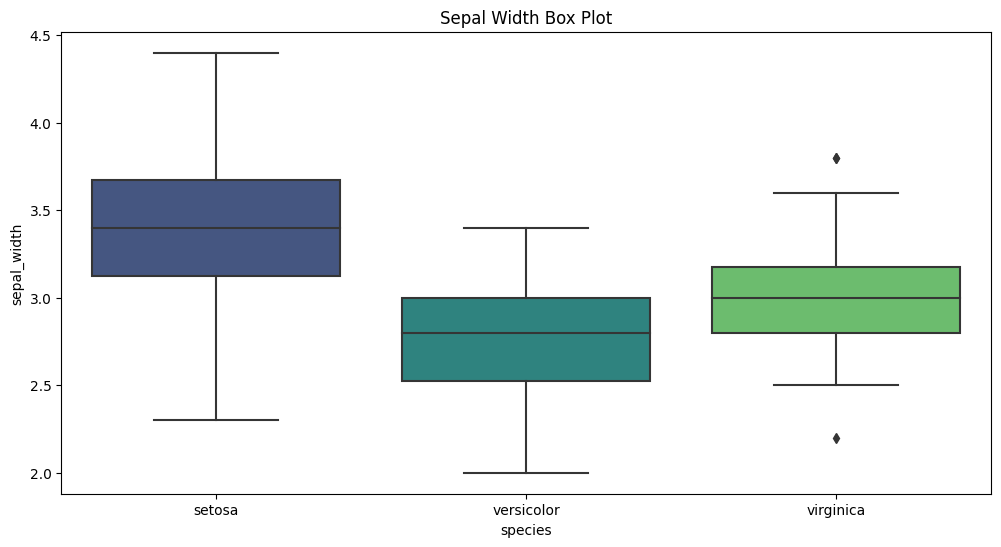

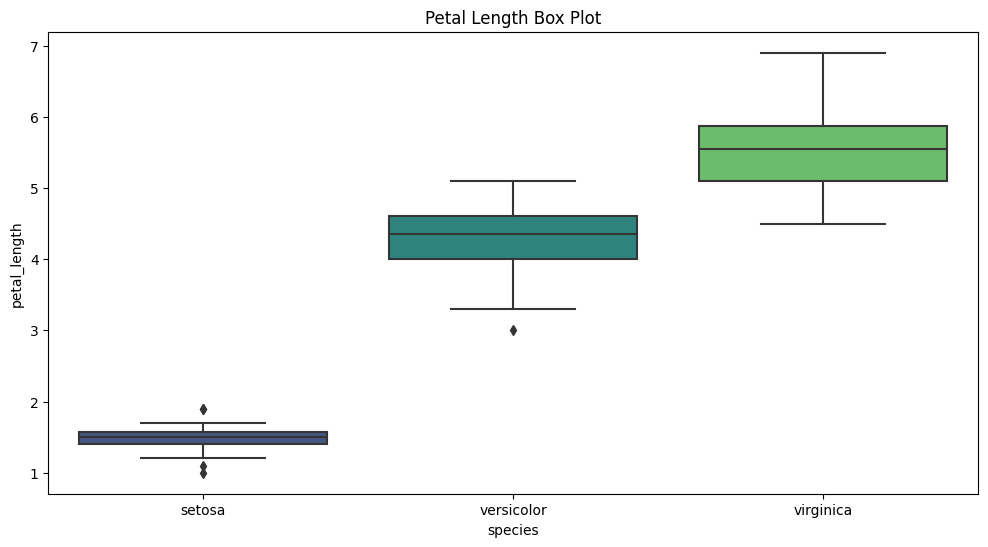

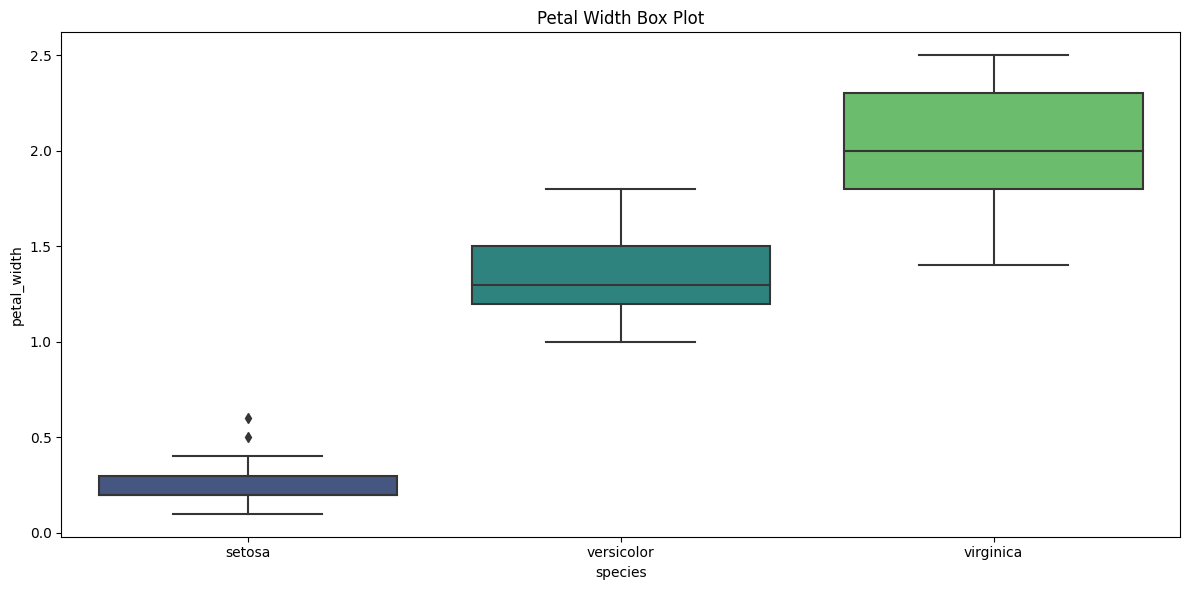

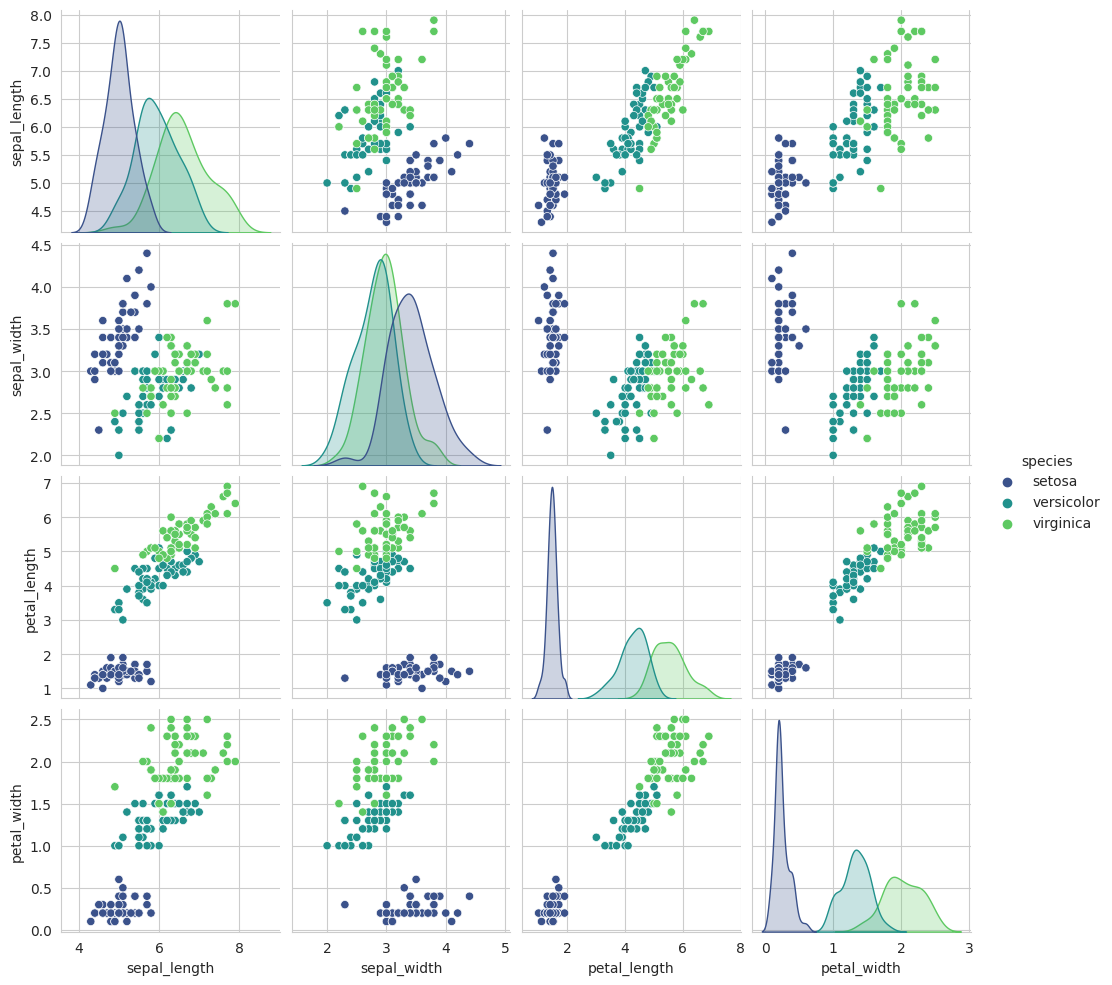

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

palette = "viridis"

plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="petal_length", hue="species", palette=palette)
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()

# Box plots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_length", palette=palette)
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_width", palette=palette)
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_length", palette=palette)
plt.title("Petal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_width", palette=palette)
plt.title("Petal Width Box Plot")

plt.tight_layout()

# Pair plots to visualize relationships between features
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', palette=palette)
plt.show()


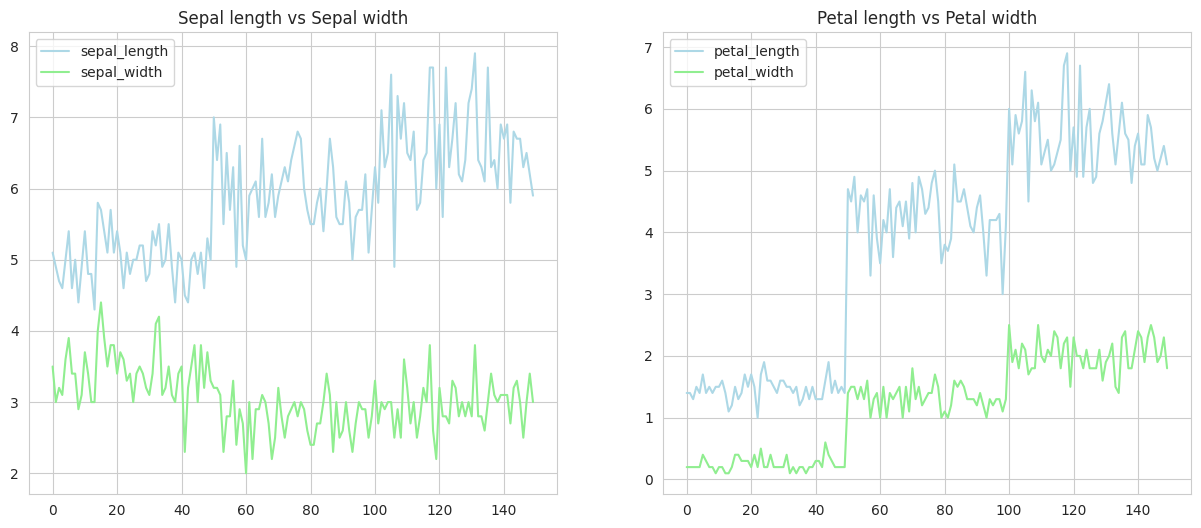

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(df['sepal_length'], label='sepal_length',color='lightblue')
ax[0].plot(df['sepal_width'], label='sepal_width',color='lightgreen')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(df['petal_length'], label='petal_length',color='lightblue')
ax[1].plot(df['petal_width'], label='petal_width',color='lightgreen')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()

plt.show()


###### The pair plot and box plots clearly show that the three species of Iris flowers have distinct characteristics in terms of sepal length, sepal width, petal length, and petal width. Setosa typically has shorter sepal and petal lengths but wider sepals, while Virginica has longer sepals and petals compared to the other two species. Versicolor falls in between Setosa and Virginica in terms of these measurements.
###### These visualizations helped in understanding the relationships and differences between Iris species and features, making it easier to classify and analyze these flowers based on their measurements.

# Modeling

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

